In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

<h1>Air Visit Data DB from csv</h1>

In [2]:
df = pd.read_csv("../input/air_visit_data.csv", parse_dates=['visit_date'])

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252108 entries, 0 to 252107
Data columns (total 3 columns):
air_store_id    252108 non-null object
visit_date      252108 non-null datetime64[ns]
visitors        252108 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 5.8+ MB


In [4]:
df.dtypes

air_store_id            object
visit_date      datetime64[ns]
visitors                 int64
dtype: object

In [5]:
df.head(20)

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6
5,air_ba937bf13d40fb24,2016-01-19,9
6,air_ba937bf13d40fb24,2016-01-20,31
7,air_ba937bf13d40fb24,2016-01-21,21
8,air_ba937bf13d40fb24,2016-01-22,18
9,air_ba937bf13d40fb24,2016-01-23,26


In [6]:
df.describe()

,visitors
count,252108.000000
mean,20.973761
std,16.757007
min,1.000000
25%,9.000000
50%,17.000000
75%,29.000000
max,877.000000


In [7]:
df.isnull().values.any()

False

Data is clean and it does not contain any missing values.

<h2>Column: visit_date</h2>

In [8]:
print(df['visit_date'].describe())
print('\n\n')
print("unique of visit_date is %s" %len(df['visit_date'].unique())) # 2016-01-01 - 2017-04-22
print('\n\n')
print(df['visit_date'].dtype)

count                  252108
unique                    478
top       2017-03-17 00:00:00
freq                      799
first     2016-01-01 00:00:00
last      2017-04-22 00:00:00
Name: visit_date, dtype: object



unique of visit_date is 478



datetime64[ns]


<h2>Column : air_store_id</h2>

In [8]:
print(df['air_store_id'].describe()) # 829 * 478

count                   252108
unique                     829
top       air_5c817ef28f236bdf
freq                       477
Name: air_store_id, dtype: object


<h2>Column : visitors</h2>

In [18]:
print(df['visitors'].describe()) # 829 * 478
print('\n\n')
print(df['visitors'].dtype)
print('\n\n')
print(len(df['visitors'].unique()))

count    252108.000000
mean         20.973761
std          16.757007
min           1.000000
25%           9.000000
50%          17.000000
75%          29.000000
max         877.000000
Name: visitors, dtype: float64



int64



204


<h2>Data Visualization</h2>

In [10]:
#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html


df_visits = df[['visit_date', 'visitors']] # select columns of visit_date and visitors
#df_visits


df_visits.index = df_visits['visit_date'] # Set index (rows ) to be by date

#df_visits # Output : visit_date (indexs\rows) col1 = visit_date col2 = visitors

del df_visits['visit_date'] # Delete column visit_date

In [11]:
df_visits

,visitors
visit_date,
2016-01-13,25
2016-01-14,32
2016-01-15,29
2016-01-16,22
2016-01-18,6
2016-01-19,9
2016-01-20,31
2016-01-21,21
2016-01-22,18


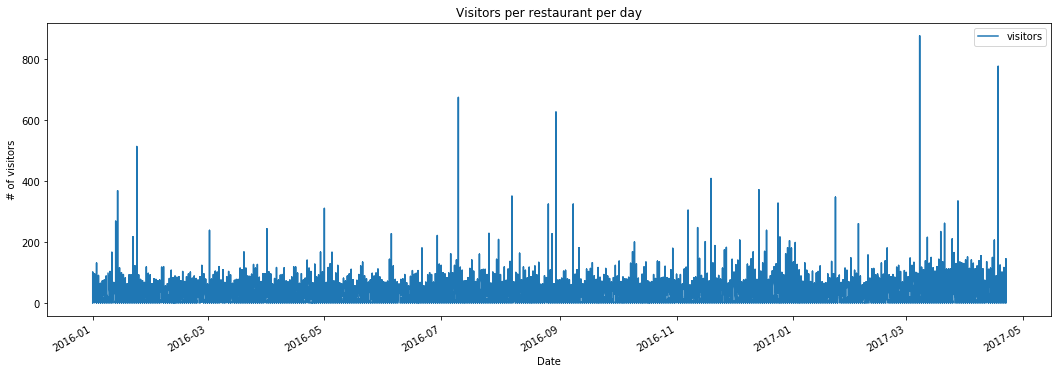

In [12]:
# https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot
ax = df_visits.plot(figsize=(18,6),  
                          title='Visitors per restaurant per day');
ax.set_xlabel("Date")
ax.set_ylabel("# of visitors");

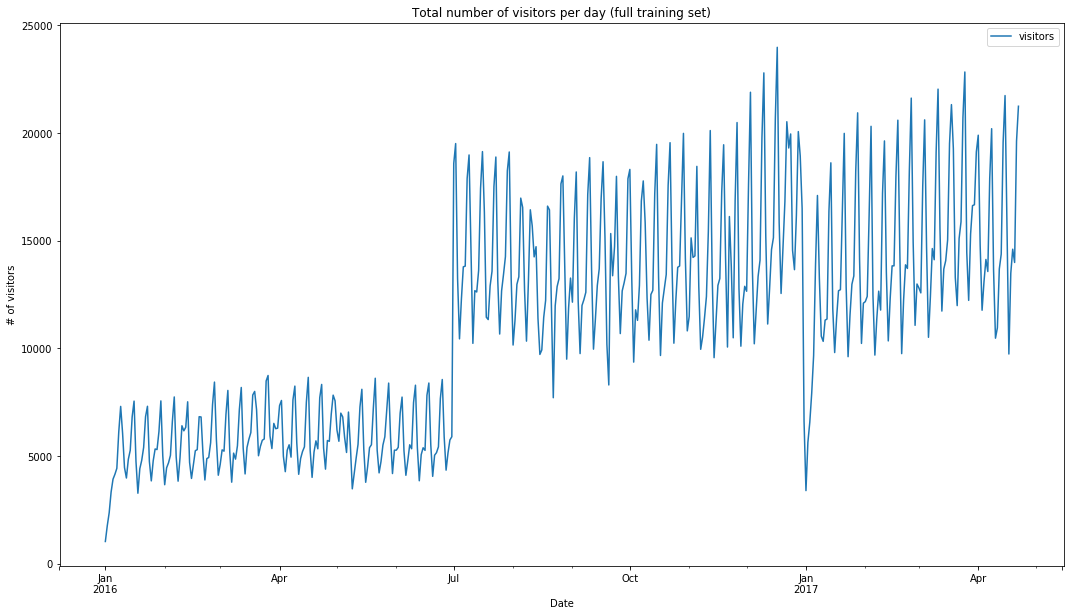

In [15]:
ax = df_visits.resample('D').sum().plot(figsize=(18,6), 
                                   title='Total number of visitors per day (full training set)');
ax.set_xlabel("Date")
ax.set_ylabel("# of visitors");

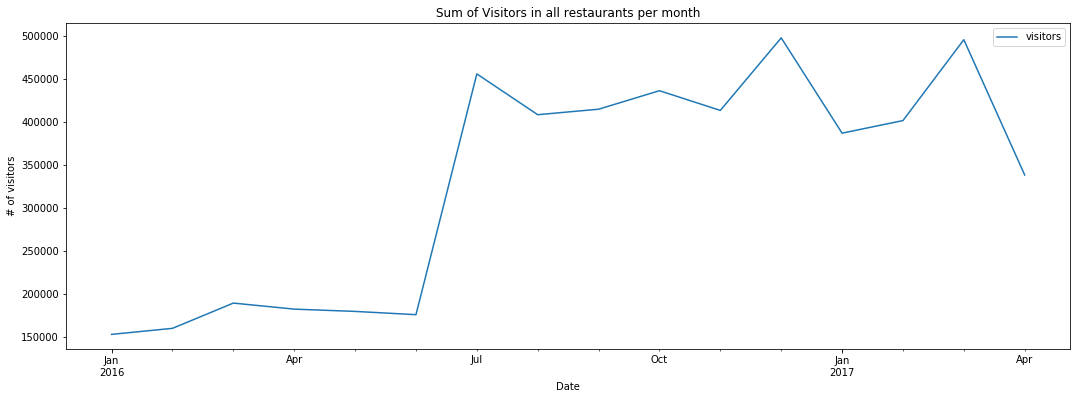

In [23]:
ax = df_visits.resample('M').sum().plot(figsize=(18,6), 
                                   title='Sum of Visitors in all restaurants per month');
ax.set_xlabel("Date")
ax.set_ylabel("# of visitors");

In [24]:
# double check
df_visits['2017-03-01' : '2017-04-01'].sum()

visitors    515387
dtype: int64

In [25]:
# double check
df_visits['2016-06-01' : '2016-07-01'].sum()

visitors    194408
dtype: int64

In [27]:
# The restaurants sorted by overall number of visitors

# ******************* #
#  SELECT air_store_id , sum(visitors) AS "Overall number of visitors"
#  FROM air_visit_data
#  GROUP BY air_store_id
#  ORDER BY Overall number of visitors DECS;
# ************************ #
df.groupby('air_store_id')['visitors'] \
    .agg({"Overall number of visitors": "sum"}) \
    .sort_values(by="Overall number of visitors", ascending=False)

/home/gali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  # Remove the CWD from sys.path while we load stuff.


,Overall number of visitors
air_store_id,
air_399904bdb7685ca0,18717
air_f26f36ec4dc5adb0,18577
air_e55abd740f93ecc4,18101
air_99157b6163835eec,18097
air_5c817ef28f236bdf,18009
air_d97dabf7aae60da5,17971
air_3525f11ef0bf0c35,17958
air_681f96e6a6595f82,17559
air_d34c0861a2be94cb,17467
